In [1]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 9.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.429e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 858.8114269155328
Iteration:      2,   Func. Count:     11,   Neg. LLF: 858.3955517227495
Iteration:      3,   Func. Count:     17,   Neg. LLF: 857.5452397950736
Iteration:      4,   Func. Count:     22,   Neg. LLF: 857.0520710764818
Iteration:      5,   Func. Count:     27,   Neg. LLF: 854.7268354995242
Iteration:      6,   Func. Count:     32,   Neg. LLF: 3785.864612043553
Iteration:      7,   Func. Count:     38,   Neg. LLF: 10401.514974973596
Iteration:      8,   Func. Count:     44,   Neg. LLF: 1078.8803788651437
Iteration:      9,   Func. Count:     51,   Neg. LLF: 840.9207608142007
Iteration:     10,   Func. Count:     56,   Neg. LLF: 842.2560282989048
Iteration:     11,   Func. Count:     62,   Neg. LLF: 840.6235680940397
Iteration:     12,   Func. Count:     67,   Neg. LLF: 840.6226885445727
Iteration:     13,   Func. Count:     72,   Neg. LLF: 840.6225129129634
Iteration:     14,   Func. Count:     77,   Neg. LLF: 840.6224

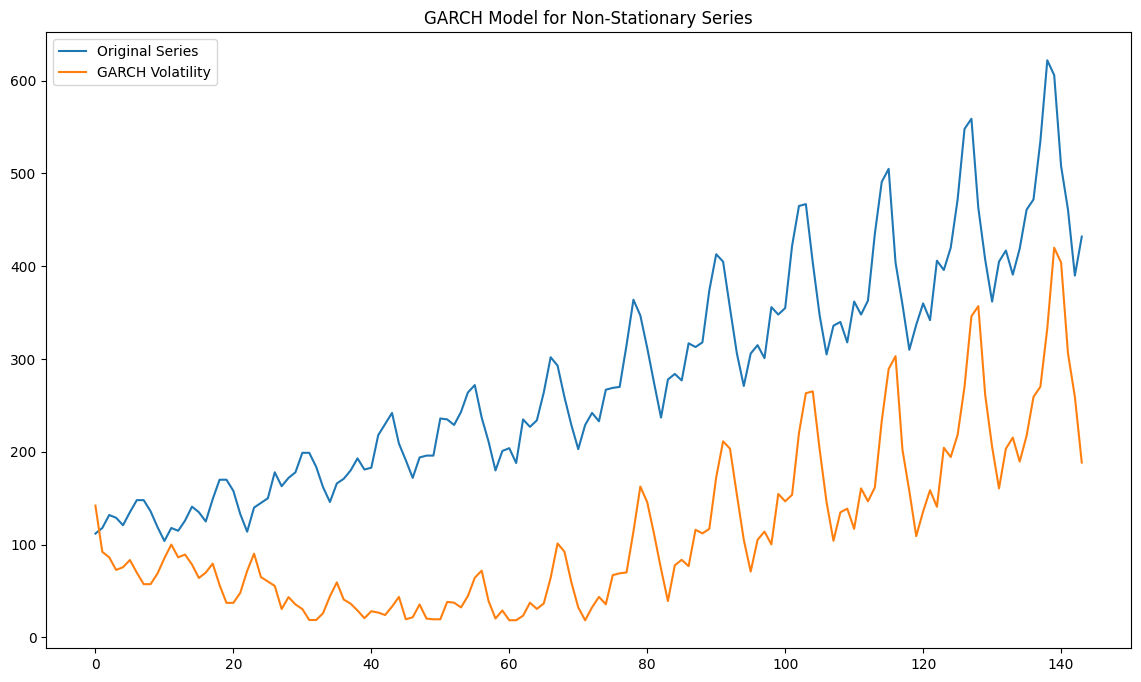

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1301.4302317164934
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1245.3346555727846
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1244.600079715983
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1244.5954712670946
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1244.5926769082298
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1244.5852715624346
Iteration:      7,   Func. Count:     41,   Neg. LLF: 1244.546559050291
Iteration:      8,   Func. Count:     46,   Neg. LLF: 1244.3466620857835
Iteration:      9,   Func. Count:     51,   Neg. LLF: 1244.1177169345997
Iteration:     10,   Func. Count:     56,   Neg. LLF: 1244.113237179952
Iteration:     11,   Func. Count:     61,   Neg. LLF: 1244.1098838071057
Iteration:     12,   Func. Count:     66,   Neg. LLF: 1244.1098767848075
Iteration:     13,   Func. Count:     71,   Neg. LLF: 1244.1098701015571
Iteration:     14,   Func. Count:     75,   Neg. LLF: 

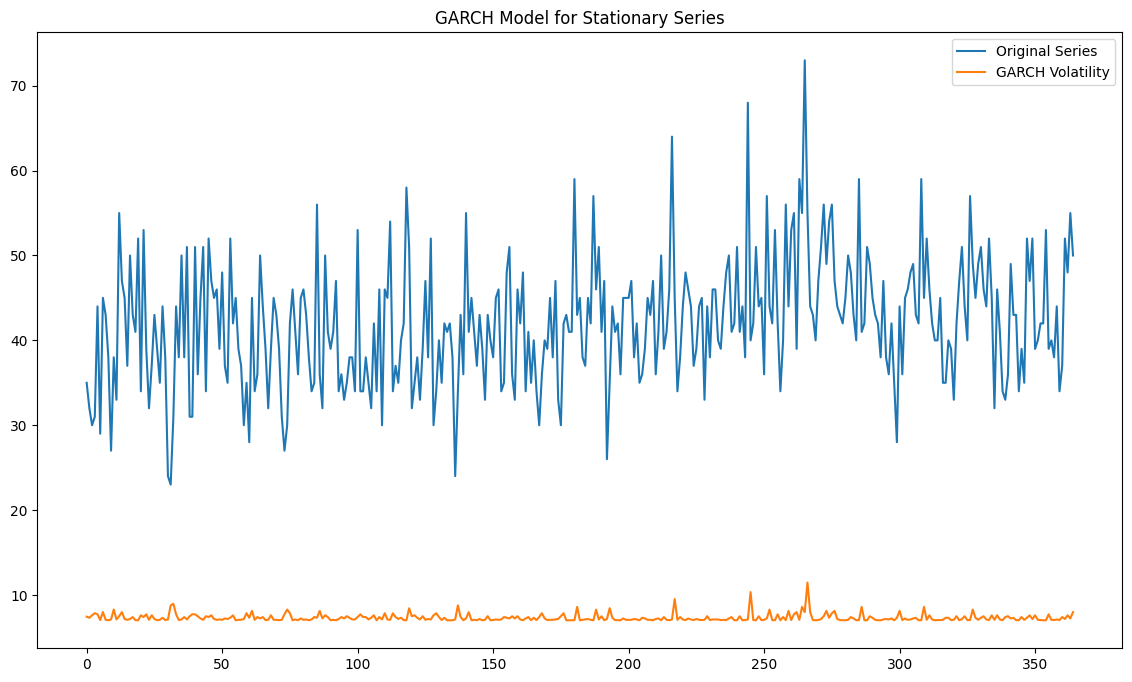

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Загружаем данные
file_path_non_stationary = "/content/drive/MyDrive/international-airline-passengers.csv"
file_path_stationary = "/content/drive/MyDrive/daily-total-female-births-in-cal.csv"

non_stationary_series = pd.read_csv(file_path_non_stationary)['Count']
stationary_series = pd.read_csv(file_path_stationary)['Count']

# Функция для построения модели GARCH
def fit_garch_model(series, title):
    # Определяем и строим модель GARCH
    model = arch_model(series, vol='Garch', p=1, q=1)
    results = model.fit()

    # Выводим статистику модели
    print(results.summary())

    # Визуализируем результаты
    plt.figure(figsize=(14, 8))
    plt.plot(series, label='Original Series')
    plt.plot(results.conditional_volatility, label='GARCH Volatility')
    plt.title(f'GARCH Model for {title}')
    plt.legend()
    plt.show()

# Строим модели GARCH для обоих рядов
fit_garch_model(non_stationary_series, "Non-Stationary Series")
fit_garch_model(stationary_series, "Stationary Series")